### Treść zadania

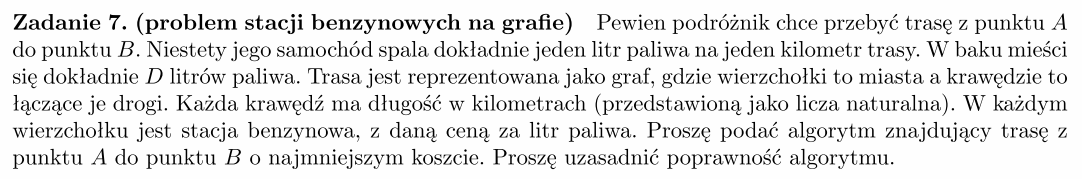

### Omówienie algorytmu

W skrócie to idea jest taka, że korzystamy z algorytmu Dijkstry (jak praktycznie zawsze, gdy chodzi o najkrótsze/najtańsze ścieżki z wagami nieujemnymi), ale musimy nieco zmienić sposób relaksacji wierzchołków. Tym razem do wierzchołka możemy dotrzeć z różną ilością paliwa, więc pierwsze dotarcie najtańszą dotychcas ścieżką może się okazać niewystarczające z tego względu, że np. zabraknie nam paliwa, by jechać dalej. Jest jeszcze jeden problem, a mianowicie, wjeżdżając na stację, nie wiemy, ile na niej musimy zatankować i jaki jest koszt tankowania. z tego powodu najtańsza dotychczas ścieżka może stać się nieopłacalna. Konieczne jest zatem myślenie o wierzchołkach jak o serii $ D + 1 $ wierzchołków, gdzie dotarcie do danego wierzchołka $ i $ ($ 0 \le i \le D $) oznacza przyjechanie na stację z ilością paliwa w postaci $ i $ litrów. Konieczne jest więc wyznaczanie najkrótszych ścieżek do wierzchołków (stacji) przy danej ilości końcowej paliwa. (Dokładniejszy opis w podlinkowanym wyżej zadaniu)

### Złożoność

###### Obliczeniowa:
$ O(D \cdot E \cdot log(V)) $
###### Pamięciowa:
$ O(D \cdot V) $

### Implementacja

In [1]:
from queue import PriorityQueue


def dijkstra(G: 'graph represented by adjacency matrix', 
             C: 'array of fuel prices on the stations',
             d: 'capacity of a fuel tank',
             fuel: 'initial amount of fuel',
             s: 'start vertex',
             t: 'end vertex'):
    n = len(G)
    inf = float('inf')
    W = [[inf] * (d + 1) for _ in range(n)]
    P = [[None] * (d + 1) for _ in range(n)]
    pq = PriorityQueue()
    pq.put((0, fuel, 0, s, None))
    
    end_fuel = None
    
    while not pq.empty():
        # fuel is amout of fuel which we had when reached
        # the u vertex (the same min_cost is cost of reaching
        # teh u vertex without refueling on its station)
        min_cost, fuel, prev_fuel, u, parent = pq.get()
        
        if min_cost < W[u][fuel]:
            W[u][fuel] = min_cost
            P[u][fuel] = (parent, prev_fuel)
            
            if u == t: 
                end_fuel = fuel
                break
            
            for v, dist in G[u]:
                for refueled in range(max(0, dist - fuel), d - fuel + 1):
                    new_fuel = fuel + refueled
                    # Add to the queue if only there is no
                    # shortest path to the v vertex with the
                    # new_fuel amount of fuel remaining
                    if W[v][new_fuel] == inf:
                        pq.put((min_cost + refueled * C[u], new_fuel - dist, fuel, v, u))

    return (W, P, end_fuel) if end_fuel is not None else (None,) * 3


def get_path(P, end_fuel, t):
    path = [t]
    
    entry = P[t][end_fuel]
    while True:
        print(entry)
        t, fuel = entry
        if t is None: break
        path.append(t)
        entry = P[t][fuel]
        
    path.reverse()
    return path


def cheapest_travel(G: 'graph represented by adjacency matrix', 
                    C: 'array of fuel prices on the stations',
                    d: 'capacity of a fuel tank',
                    fuel: 'initial amount of fuel',
                    s: 'start vertex',
                    t: 'end vertex'):
    W, P, end_fuel = dijkstra(G, C, d, fuel, s, t)
    print(*W, sep='\n')
    return (W[t][end_fuel], get_path(P, end_fuel, t)) if W else (None,) * 2

###### Kilka testów

##### Pomocnicze

In [2]:
def undirected_weighted_graph_list(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[] for _ in range(n)]
    for e in E:
        G[e[0]].append((e[1], e[2]))
        G[e[1]].append((e[0], e[2]))
    return G

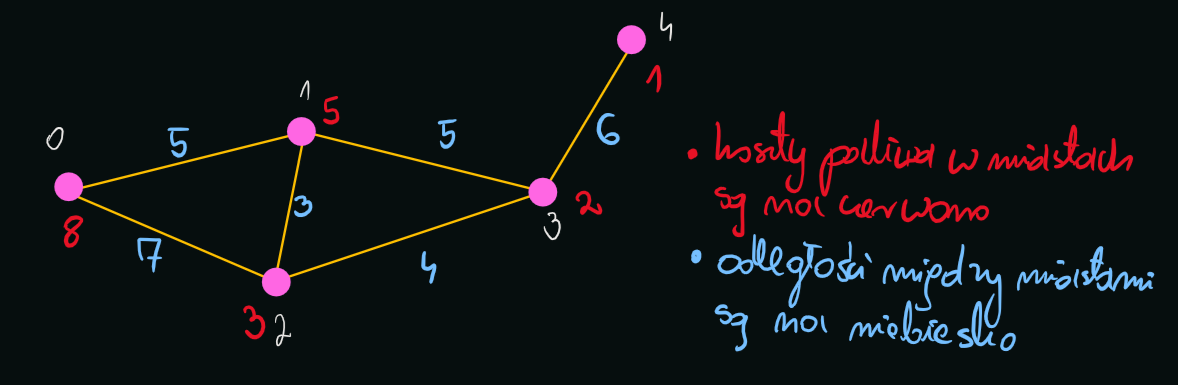

In [3]:
E = [(0, 1, 5), (1, 2, 3), (0, 2, 7), (2, 3, 4), (3, 4, 6)]
C = [8, 5, 3, 2, 1]
G = undirected_weighted_graph_list(E)

s = 0
t = 4
capacity = 10
fuel = 0

print(cheapest_travel(G, C, capacity, fuel, s, t))

[0, 70, 75, inf, inf, inf, inf, inf, inf, inf, inf]
[40, 48, 56, 64, 72, inf, inf, inf, inf, inf, inf]
[55, 60, 65, 70, 75, inf, inf, inf, inf, inf, inf]
[67, 70, 73, 76, inf, inf, inf, inf, inf, inf, inf]
[79, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
(3, 0)
(2, 0)
(1, 0)
(0, 0)
(None, 0)
(79, [0, 1, 2, 3, 4])


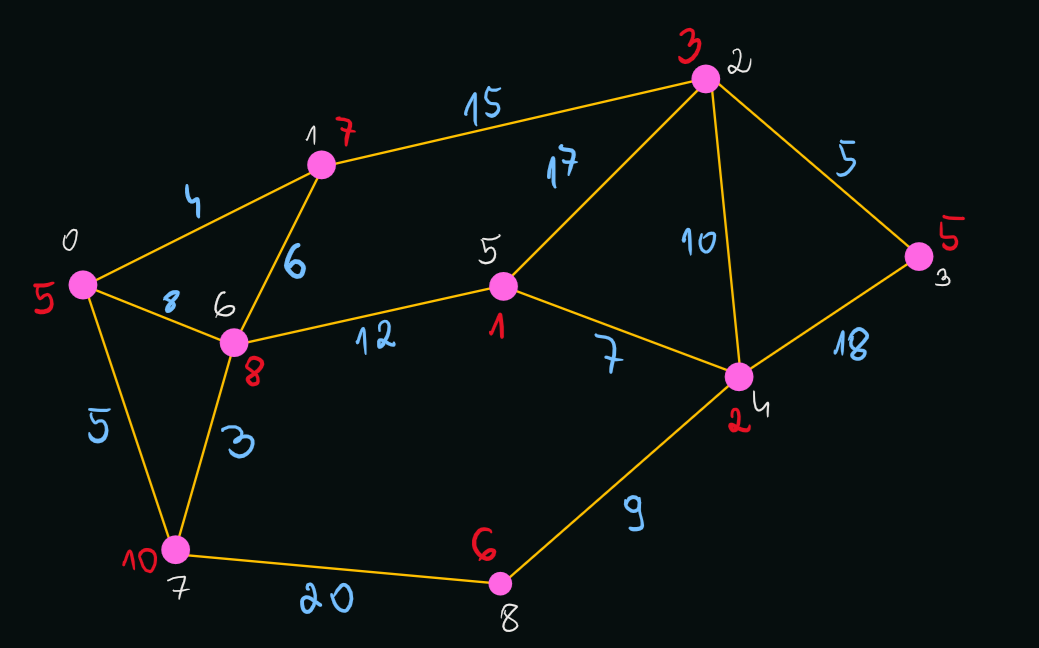

In [4]:
C = [(0, 1, 4), (0, 7, 5), (0, 6, 8), (6, 7, 3), (1, 6, 6), (7, 8, 20), (8, 4, 9),
     (5, 6, 12), (5, 4, 7), (1, 2, 15), (5, 2, 17), (2, 4, 10), (2, 3, 5), (4, 3, 18)]
C = [5, 7, 3, 5, 2, 1, 8, 10, 6]
G = undirected_weighted_graph_list(E)

s = 0
t = 3
# capacity = 12
# capacity = 15
capacity = 14
fuel = 5

print(cheapest_travel(G, C, capacity, fuel, s, t))

[inf, inf, inf, inf, inf, 0, inf, inf, inf, inf, inf, inf, inf, inf, inf]
[0, 5, 10, 15, 20, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
[10, 15, 20, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
[22, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
[inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
(2, 0)
(0, 5)
(None, 0)
(22, [0, 2, 3])
